In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

C:\Users\Phillip\AppData\Roaming\Python\Python39\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Phillip\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Phillip\AppData\Roaming\Python\Python39\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
d:\Users\Phillip\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
merge = pd.read_csv('./tableau.csv')

In [3]:
merge

,Unnamed: 0,user_pseudo_id,target_max_day_played,mission_id,mission_difficulty,mission_stars_collected,day_auto_increment,lifetime_played_runs,max_run_distance,total_purchases_virtual,total_ads_watched,total_purchases_real,geo_country,days_played_in_month,virtual_currency_balance,event_timestamp,mission_played
0,0,794,0,115,1.0,3.0,0.0,1.0,1183.0,0.0,0.0,0.0,India,0.0,5715.0,19-02-2022 18:47:18,1
1,1,794,0,113,1.0,3.0,0.0,1.0,1183.0,0.0,0.0,0.0,India,0.0,5715.0,19-02-2022 18:47:52,2
2,2,794,0,109,1.0,3.0,0.0,1.0,1183.0,0.0,0.0,0.0,India,0.0,5715.0,19-02-2022 18:47:57,3
3,3,794,0,11,1.0,6.0,0.0,3.0,1695.0,0.0,2.0,0.0,India,0.0,6842.0,19-02-2022 18:51:30,4
4,4,794,0,114,1.0,7.0,0.0,4.0,1695.0,0.0,3.0,0.0,India,0.0,7342.0,19-02-2022 18:53:40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560558,2680035,99999617,2,115,1.0,7.0,1.0,3.0,1888.0,1500.0,0.0,0.0,Mexico,1.0,5368.0,12-02-2022 15:02:46,6
2560559,2680036,99999617,2,6,1.0,7.0,1.0,3.0,1888.0,1500.0,0.0,0.0,Mexico,1.0,5368.0,12-02-2022 15:03:07,7
2560560,2680037,99999617,2,19,2.0,10.0,1.0,4.0,1888.0,4000.0,0.0,0.0,Mexico,1.0,3616.0,12-02-2022 15:04:28,8
2560561,2680038,99999617,2,12,2.0,12.0,1.0,5.0,1888.0,4000.0,0.0,0.0,Mexico,1.0,3616.0,12-02-2022 15:05:36,9


In [4]:
X = merge.drop(['target_max_day_played','Unnamed: 0','geo_country'], axis = 1)
y = merge['target_max_day_played'] 

In [5]:
id = X['user_pseudo_id']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.drop(['user_pseudo_id','event_timestamp'],axis=1,inplace=True)
X_test.drop(['user_pseudo_id','event_timestamp'],axis=1,inplace=True)

In [8]:
numerical_train = X_train.select_dtypes(np.number)
numerical_test = X_test.select_dtypes(np.number)
categorical_train= X_train.select_dtypes(object)
categorical_test= X_test.select_dtypes(object)



In [9]:
transformer = MinMaxScaler().fit(numerical_train)
numerical_train_standardized = pd.DataFrame(transformer.transform(numerical_train),index=numerical_train.index, columns = numerical_train.columns)
numerical_test_standardized = pd.DataFrame(transformer.transform(numerical_test),index=numerical_test.index, columns = numerical_test.columns)

In [10]:
encoder = OneHotEncoder(drop='first',handle_unknown='error').fit(categorical_train)
categorical_train_encoded = encoder.transform(categorical_train).toarray()
categorical_test_encoded = encoder.transform(categorical_test).toarray()
cols = encoder.get_feature_names(input_features=categorical_train.columns)
categorical_train_encoded = pd.DataFrame(categorical_train_encoded, index=categorical_train.index, columns=[i.lower() for i in cols])
categorical_test_encoded = pd.DataFrame(categorical_test_encoded, index=categorical_test.index, columns=[i.lower() for i in cols])


d:\Users\Phillip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
X_train = pd.concat((numerical_train_standardized,categorical_train_encoded),axis=1)
X_test = pd.concat((numerical_test_standardized,categorical_test_encoded),axis=1)

In [12]:
LR = LogisticRegression().fit(X_train,y_train)

d:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
score = LR.score(X_test, y_test)
score

0.16164596485541277

In [14]:
LR = LinearRegression().fit(X_train,y_train)

In [15]:
score = LR.score(X_test, y_test)
score

0.05691484640348499

In [16]:
from xgboost import XGBRegressor

In [17]:
from xgboost import XGBClassifier

{'subsample': 0.5,
 'min_child_weight': 0.5,
 'max_depth': 10,
 'eval_metric': 'rmse',
 'eta': 0.2,
 'colsample_bytree': 1}

In [18]:
model = XGBRegressor(
    max_depth=10,
    n_estimators=100,
    min_child_weight=0.5, 
    colsample_bytree=1, 
    subsample=0.5, 
    eta=0.2,
    seed=42)

In [19]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)   # https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

In [20]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 40)

d:\Users\Phillip\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
d:\Users\Phillip\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:6.12651	validation_1-rmse:6.13397
[1]	validation_0-rmse:5.64944	validation_1-rmse:5.65738
[2]	validation_0-rmse:5.32043	validation_1-rmse:5.32921
[3]	validation_0-rmse:5.09804	validation_1-rmse:5.10781
[4]	validation_0-rmse:4.94975	validation_1-rmse:4.96074
[5]	validation_0-rmse:4.85128	validation_1-rmse:4.86364
[6]	validation_0-rmse:4.78607	validation_1-rmse:4.79962
[7]	validation_0-rmse:4.74306	validation_1-rmse:4.75802
[8]	validation_0-rmse:4.71486	validation_1-rmse:4.73096
[9]	validation_0-rmse:4.69552	validation_1-rmse:4.71282
[10]	validation_0-rmse:4.68265	validation_1-rmse:4.70108
[11]	validation_0-rmse:4.67339	validation_1-rmse:4.69324
[12]	validation_0-rmse:4.66699	validation_1-rmse:4.68804
[13]	validation_0-rmse:4.66216	validation_1-rmse:4.68469
[14]	validation_0-rmse:4.65869	validation_1-rmse:4.68228
[15]	validation_0-rmse:4.65573	validation_1-rmse:4.68030
[16]	validation_0-rmse:4.65322	validation_1-rmse:4.67867
[17]	validation_0-rmse:4.65132	validation

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=0.5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, ...)

In [21]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 7.74%


In [24]:
import matplotlib as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

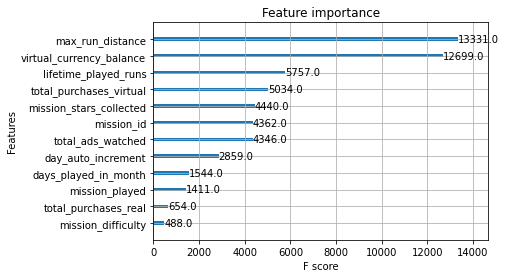

In [25]:
xgb.plot_importance(model)

In [26]:
from sklearn.model_selection import RandomizedSearchCV


max_depth_choices= [3,6,10,None]
eval_metric = ['rmse']
min_child_weight = [0.3,0.5,1]
colsample_bytree = [0.5,0.8,1]
subsample = [0.5,0.8,1]
eta= [0.1,0.2]


random_grid = {'max_depth': max_depth_choices,
                'eval_metric': eval_metric,
               'min_child_weight': min_child_weight,
               'colsample_bytree': colsample_bytree,
               'subsample': subsample,
                'eta': eta }

In [27]:
model = XGBRegressor(
    n_estimators=10,
    seed=42)

In [28]:
random_search = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter=25, cv = 2, n_jobs = 10)

In [29]:
random_search.fit(X_train,y_train,verbose=1)

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                            

In [30]:
random_search.best_params_

{'subsample': 1,
 'min_child_weight': 0.5,
 'max_depth': 10,
 'eval_metric': 'rmse',
 'eta': 0.2,
 'colsample_bytree': 1}

In [31]:
merge.dtypes

Unnamed: 0                    int64
user_pseudo_id                int64
target_max_day_played         int64
mission_id                    int64
mission_difficulty          float64
mission_stars_collected     float64
day_auto_increment          float64
lifetime_played_runs        float64
max_run_distance            float64
total_purchases_virtual     float64
total_ads_watched           float64
total_purchases_real        float64
geo_country                  object
days_played_in_month        float64
virtual_currency_balance    float64
event_timestamp              object
mission_played                int64
dtype: object